In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [2]:
df=pd.read_csv("stock_infosys.csv")

In [3]:
df.head()

,Date,Close,Open,High,Low,Vol-Million,Change %
0,"Jun 18, 2018",1269.20,1281.80,1291.00,1264.05,2.86,-0.01
1,"Jun 15, 2018",1281.25,1237.00,1291.50,1235.00,9.98,0.03
2,"Jun 14, 2018",1239.70,1253.00,1253.00,1234.10,3.80,-0.02
3,"Jun 13, 2018",1264.80,1256.86,1273.93,1256.86,2.88,0.01
4,"Jun 12, 2018",1248.63,1255.82,1261.28,1240.64,3.92,0.00


In [4]:
df.shape

(249, 7)

In [5]:
df['Date']=pd.to_datetime(df.Date)

In [6]:
df.head()

,Date,Close,Open,High,Low,Vol-Million,Change %
0,2018-06-18,1269.20,1281.80,1291.00,1264.05,2.86,-0.01
1,2018-06-15,1281.25,1237.00,1291.50,1235.00,9.98,0.03
2,2018-06-14,1239.70,1253.00,1253.00,1234.10,3.80,-0.02
3,2018-06-13,1264.80,1256.86,1273.93,1256.86,2.88,0.01
4,2018-06-12,1248.63,1255.82,1261.28,1240.64,3.92,0.00


In [7]:
df['Date'] = df['Date'].dt.strftime('%y%j')

In [8]:
df.head()

,Date,Close,Open,High,Low,Vol-Million,Change %
0,18169,1269.20,1281.80,1291.00,1264.05,2.86,-0.01
1,18166,1281.25,1237.00,1291.50,1235.00,9.98,0.03
2,18165,1239.70,1253.00,1253.00,1234.10,3.80,-0.02
3,18164,1264.80,1256.86,1273.93,1256.86,2.88,0.01
4,18163,1248.63,1255.82,1261.28,1240.64,3.92,0.00


In [9]:
x=df[['Date','Open','High','Low']]
y=df['Close']

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.10,random_state=42,
shuffle=True)

In [11]:
model =  DecisionTreeRegressor(max_depth=5,random_state=0)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [12]:
model_score = model.score(xtrain,ytrain)
print("R2:",model_score)
ypred = model.predict(xtest)
mse=mean_squared_error(ytest, ypred)
print('MSE',mse)
r2=r2_score(ytest, ypred)
print('RSquare',r2)

R2: 0.9978519773712109
MSE 56.57816848968588
RSquare 0.9963109955869516


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [14]:
rf.fit(xtrain,ytrain)
rf_score = rf.score(xtrain,ytrain)
print("R2:",rf_score)
y_pred = rf.predict(xtest)
rf_mse=mean_squared_error(ytest, y_pred)
print('MSE',rf_mse)
rf_r2=r2_score(ytest, y_pred)
print('RSquare',rf_r2)

R2: 0.9993313688341083
MSE 34.80490669000149
RSquare 0.9977306537520995


In [15]:
ada=AdaBoostRegressor()
ada.fit(xtrain,ytrain)
ada_score = ada.score(xtrain,ytrain)
print("R2:",ada_score)
y_pred = ada.predict(xtest)
ada_mse=mean_squared_error(ytest, y_pred)
print('MSE',ada_mse)
ada_r2=r2_score(ytest, y_pred)
print('RSquare',ada_r2)

R2: 0.9965650422735096
MSE 62.251666608605035
RSquare 0.9959410726969604


In [16]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.externals.six import StringIO
data=StringIO()
export_graphviz(model,out_file=data,filled=True,max_depth=2,feature_names=x.columns)
graph=pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())

ModuleNotFoundError: No module named 'pydot'

[Text(167.4, 190.26, 'X[0] <= 18010.5\nmse = 12320.827\nsamples = 224\nvalue = 1048.202'),
 Text(83.7, 135.9, 'X[3] <= 948.375\nmse = 1896.215\nsamples = 127\nvalue = 958.565'),
 Text(41.85, 81.53999999999999, 'X[2] <= 924.95\nmse = 478.114\nsamples = 63\nvalue = 921.497'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 1006.875\nmse = 608.08\nsamples = 64\nvalue = 995.055'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[1] <= 1197.625\nmse = 1676.806\nsamples = 97\nvalue = 1165.561'),
 Text(209.25, 81.53999999999999, 'X[2] <= 1160.65\nmse = 725.049\nsamples = 81\nvalue = 1151.554'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[3] <= 1234.55\nmse = 474.149\nsamples

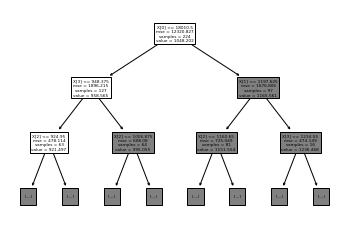

In [17]:
from sklearn.tree import plot_tree
plot_tree(model,max_depth=2)